In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [17]:
train_dir = r'D:\Downloads\Final_Assignment_Face Mask Dataset\Train'
test_dir = r'D:\Downloads\Final_Assignment_Face Mask Dataset\Test'
validation_dir = r'D:\Downloads\Final_Assignment_Face Mask Dataset\Validation'

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [19]:
train_datagen = ImageDataGenerator(rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True
)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128,128), # we standardize our target our image with 150px by 150px
    batch_size=40,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(128,128),
    batch_size=40,
    class_mode='binary'
)

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [20]:
from tensorflow.keras.applications import VGG19

conv_base = VGG19(weights='imagenet',
include_top=False,
input_shape=(128,128,3)
)

In [21]:
from tensorflow.keras import layers
from tensorflow.keras import models
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [22]:
conv_base.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

In [23]:
conv_base.trainable = False

In [24]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("CNN_Project2_Model-{epoch:02d}.h5")

In [25]:
from tensorflow import optimizers
model.compile(loss = 'binary_crossentropy',
optimizer = optimizers.RMSprop(lr=2e-5),
metrics=['acc']
)

In [26]:
history = model.fit(train_generator,
steps_per_epoch=250,
epochs= 5,
validation_data=validation_generator,
validation_steps= 20,
callbacks=[checkpoint_cb]
 )

Epoch 1/5
250/250 [==============================] - 2135s 9s/step - loss: 0.3013 - acc: 0.9011 - val_loss: 0.1029 - val_acc: 0.9663
Epoch 2/5
250/250 [==============================] - 1775s 7s/step - loss: 0.1569 - acc: 0.9462 - val_loss: 0.0699 - val_acc: 0.9800
Epoch 3/5
250/250 [==============================] - 2004s 8s/step - loss: 0.1268 - acc: 0.9561 - val_loss: 0.0556 - val_acc: 0.9825
Epoch 4/5
250/250 [==============================] - 1495s 6s/step - loss: 0.1140 - acc: 0.9601 - val_loss: 0.0474 - val_acc: 0.9837
Epoch 5/5
250/250 [==============================] - 1664s 7s/step - loss: 0.1056 - acc: 0.9617 - val_loss: 0.0389 - val_acc: 0.9862


In [27]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128,128),
    batch_size=40,
    class_mode = 'binary'
)

Found 992 images belonging to 2 classes.


In [28]:
model.evaluate(test_generator, steps=25)

25/25 [==============================] - 175s 7s/step - loss: 0.0422 - acc: 0.9879


[0.042218293994665146, 0.9879032373428345]

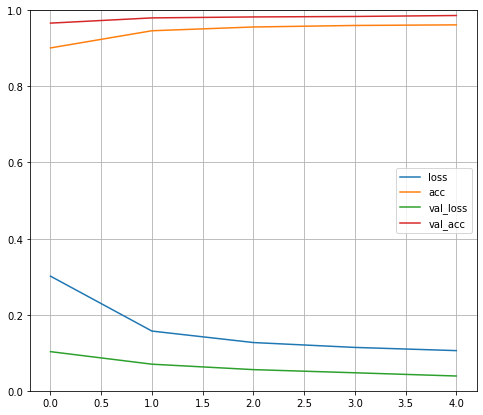

In [30]:
pd.DataFrame(history.history).plot(figsize=(8,7))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [33]:
model.save('model2.h5')